In [18]:
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import math
import random

# Make a map with occurrences of a list of species
def overlay_shapefile_on_raster(raster_path, rivers_path, major_rivers_path, lakes_path, borders_path, coordinates_path):
    
    # Set the bounding box coordinates
    xmin, xmax, ymin, ymax = -69.6462, -57.4987, -22.8721, -9.6695
    
    # Open the raster file
    with rasterio.open(raster_path) as src:
        
        # Define the window using the provided bounding box
        window = rasterio.windows.from_bounds(xmin, ymin, xmax, ymax, transform=src.transform)
        # Read the subset of the raster data for Bolivia
        subset = src.read(window=window)
        # Log-transform the raster values (add 1 to avoid log(0)) to highlight altitude differences in the lowlands
        log_transformed_subset = np.log1p(subset)
        # Plot the log-transformed subset
        fig, ax = plt.subplots(figsize=(10, 10))
        ax = rasterio.plot.show(log_transformed_subset, transform=src.window_transform(window), ax=ax, cmap='terrain')
        
        # Open the shapefile with river network using geopandas
        gdf_rivers = gpd.read_file(rivers_path)
        gdf_rivers = gdf_rivers.cx[xmin:xmax, ymin:ymax]
        # Overlay the first shapefile on top of the raster map
        gdf_rivers.plot(ax=plt.gca(), facecolor='none', edgecolor='blue', linewidth=0.1)
        
        # Open the major river shapefile using geopandas
        gdf_major = gpd.read_file(major_rivers_path)
        gdf_major = gdf_major.cx[xmin:xmax, ymin:ymax]
        # Overlay the second shapefile on top of the raster map
        gdf_major.plot(ax=plt.gca(), facecolor='none', edgecolor='blue', linewidth=0.2)

        # Open the lakes shapefile using geopandas
        gdf_lakes = gpd.read_file(lakes_path)
        gdf_lakes = gdf_lakes.cx[xmin:xmax, ymin:ymax]
        # Overlay the second shapefile on top of the raster map
        gdf_lakes.plot(ax=plt.gca(), facecolor='blue', edgecolor='none')

        # Open the borders shapefile using geopandas
        gdf_borders = gpd.read_file(borders_path)
        gdf_borders = gdf_borders.cx[xmin:xmax, ymin:ymax]        
        # Overlay the second shapefile on top of the raster map
        gdf_borders.plot(ax=plt.gca(), facecolor='none', edgecolor='black', linewidth=0.5)
        
        original_df = pd.read_csv(coordinates_path, sep='\t', encoding='latin-1')
        filtered_df = original_df.dropna(subset=['longitude'])
        # Extract coordinates
        new_df = filtered_df[['longitude', 'latitude']]
        # Print how many rows (e.g. occurrences) are left after filtering
        print(new_df.shape)
        # Convert the data to a list
        points = new_df.values.tolist()
        
        for point in points:
            plt.scatter(point[0], point[1], color='white', marker='o', s=50, edgecolor='black', linewidth=0.5)
        
        # Save the map as a pdf
        plt.savefig('../figures/map.jpg', format='jpg', dpi=300)

        # Show the plot
        plt.show()

(115, 2)


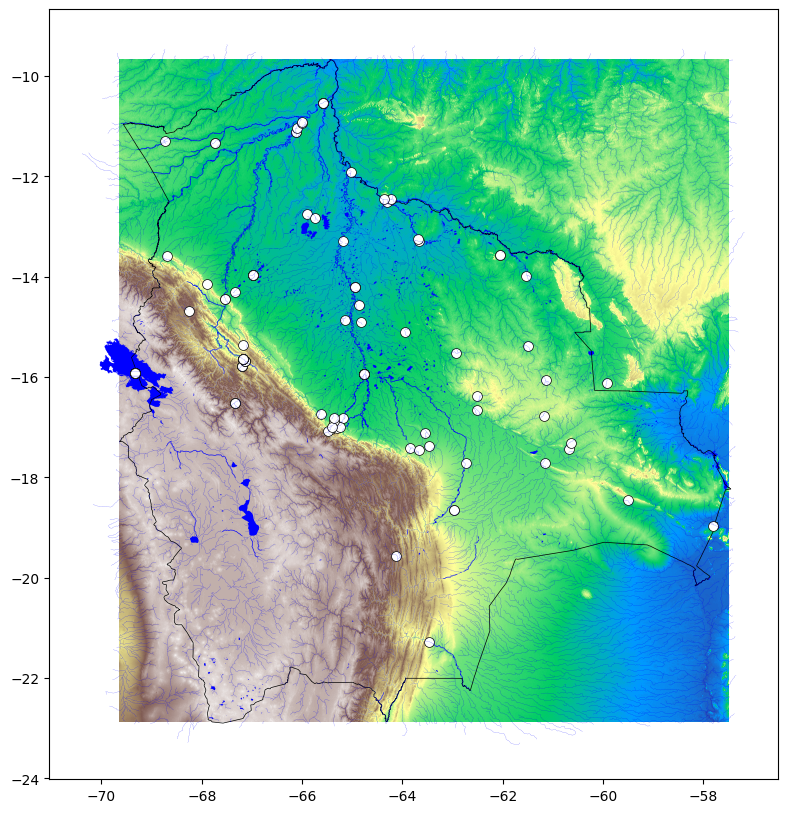

In [19]:
raster_path = '../maps/bolivia.tif'
rivers_path = '../maps/rivers_samerica_37330.shp'
borders_path = '../maps/BOL_adm0.shp'
lakes_path = '../maps/lagos_lagunas.shp'
major_rivers_path = '../maps/rios_mayores.shp'
coordinates_path = '../data/type_localities_Bolivian_fishes.txt'

overlay_shapefile_on_raster(raster_path, rivers_path, major_rivers_path, lakes_path, borders_path, coordinates_path)

In [15]:
        original_df = pd.read_csv(coordinates_path, sep='\t', encoding='latin-1')
        filtered_df = original_df.dropna(subset=['longitude'])
        # Extract coordinates
        new_df = filtered_df[['longitude', 'latitude']]
        # Print how many rows (e.g. occurrences) are left after filtering
        print(new_df.shape)
        # Convert the data to a list
        points = new_df.values.tolist()

(115, 2)
